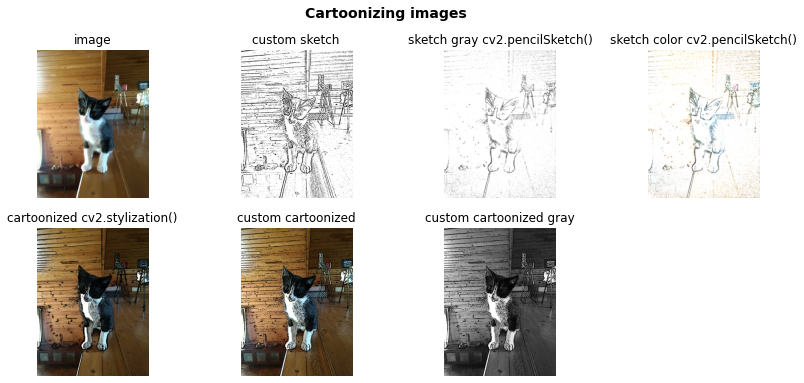

In [1]:
"""
Cartoonizing images using both custom and OpenCV functions
"""

# Import required packages:
import cv2
import matplotlib.pyplot as plt


def show_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB:
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 4, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def sketch_image(img):
    """Sketches the image applying a laplacian operator to detect the edges"""

    # Convert to gray scale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply median filter
    img_gray = cv2.medianBlur(img_gray, 5)

    # Detect edges using cv2.Laplacian()
    edges = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=5)

    # Threshold the edges image:
    ret, thresholded = cv2.threshold(edges, 70, 255, cv2.THRESH_BINARY_INV)

    return thresholded


def cartonize_image(img, gray_mode=False):
    """Cartoonizes the image applying cv2.bilateralFilter()"""

    # Get the sketch:
    thresholded = sketch_image(img)

    # Apply bilateral filter with "big numbers" to get the cartoonized effect:
    filtered = cv2.bilateralFilter(img, 10, 250, 250)

    # Perform 'bitwise and' with the thresholded img as mask in order to set these values to the output
    cartoonized = cv2.bitwise_and(filtered, filtered, mask=thresholded)

    if gray_mode:
        return cv2.cvtColor(cartoonized, cv2.COLOR_BGR2GRAY)

    return cartoonized


# Create the dimensions of the figure and set title:
plt.figure(figsize=(14, 6))
plt.suptitle("Cartoonizing images", fontsize=14, fontweight='bold')

# Load image:
image = cv2.imread('cat.jpg')

# Call the created functions for sketching and cartoonizing images:
custom_sketch_image = sketch_image(image)
custom_cartonized_image = cartonize_image(image)
custom_cartonized_image_gray = cartonize_image(image, True)

# Call the OpenCV functions to get a similar output:
sketch_gray, sketch_color = cv2.pencilSketch(image, sigma_s=30, sigma_r=0.1, shade_factor=0.1)
stylizated_image = cv2.stylization(image, sigma_s=60, sigma_r=0.07)

# Display all the resulting images:
show_with_matplotlib(image, "image", 1)
show_with_matplotlib(cv2.cvtColor(custom_sketch_image, cv2.COLOR_GRAY2BGR), "custom sketch", 2)
show_with_matplotlib(cv2.cvtColor(sketch_gray, cv2.COLOR_GRAY2BGR), "sketch gray cv2.pencilSketch()", 3)
show_with_matplotlib(sketch_color, "sketch color cv2.pencilSketch()", 4)
show_with_matplotlib(stylizated_image, "cartoonized cv2.stylization()", 5)
show_with_matplotlib(custom_cartonized_image, "custom cartoonized", 6)
show_with_matplotlib(cv2.cvtColor(custom_cartonized_image_gray, cv2.COLOR_GRAY2BGR), "custom cartoonized gray", 7)

# Show the created image:
plt.show()